#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
pt = pd.read_csv('PlayTennis.csv')
pt

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### 1.3 Use the  LabelEncoder(Converting categorical to Numerical data)

In [3]:
number = LabelEncoder()
for col in pt.columns:
    pt[col] = number.fit_transform(pt[col])
pt

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [4]:
x = pt.iloc[:,0:4].values
y = pt.iloc[:,-1].values

### 1.5 Visualize the data:(countplot)

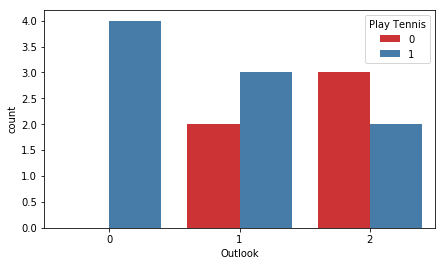

In [5]:
plt.figure(figsize=(7,4))
sns.countplot(x='Outlook',hue='Play Tennis',data=pt,palette='Set1')
plt.show()

### 1.6 Split the data into train and test set:(70/30)

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=1/3, random_state=0)

### 1.7 Train a knn

In [7]:
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### 1.8 Predict the model:

In [8]:
test_pred = model.predict(xtest)
test_pred

array([0, 1, 0, 1, 1])

### 1.9 Evaluation the model:(classification_report)

In [9]:
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75         5

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5



C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
kvals = range(1,10,2)
train_acc = []
test_acc = []

for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(xtrain,ytrain)
    
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)
    
    train_acc.append(accuracy_score(ytrain,train_pred))
    test_acc.append(accuracy_score(ytest,test_pred))

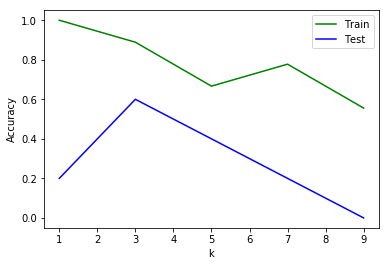

In [11]:
plt.plot(kvals,train_acc,color='g',label='Train')
plt.plot(kvals,test_acc,color='b',label='Test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [12]:
col_names = ['preganant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('pima-indians-diabetes.data',header=None,names=col_names)
pima.head()

,preganant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Find out the feature columns

In [13]:
pima.columns

Index(['preganant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

### 2.3 Extract the independent variable X and dependent variable Y?

In [14]:
x = pima.drop('label',axis=1).values
y = pima['label'].values

### 2.4 Split the data into train and test set:(70/30)

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

### 2.5 Train a GaussianNB?

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [17]:
ypred = nb_model.predict(xtest)

### 2.7 Evaluation the model:(classification_report)

In [18]:
print('Acuuracy =',accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Acuuracy = 0.7619047619047619

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

   micro avg       0.76      0.76      0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



### 2.8 Conclusion:



- for label 0, the accuracy is fairly good around 0.8 to 0.9
- for label 1 however it is significantly less, around 0.5 to 0.6

### 2.9 Confusion matrix

In [19]:
# this produces a 2x2 numpy array (matrix)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[138,  19],
       [ 36,  38]], dtype=int64)

### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): **38**

True Negatives (TN): **138**

False Positives (FP): **19**

* Falsely predict positive

Type I error

False Negatives (FN): **36**


* Falsely predict negative

Type II error

0: negative class

1: positive class

### 2.11 print the first 25 true and predicted responses

In [20]:
pd.DataFrame({'True': ytest, 'Predicted': ypred}).head(25)

,True,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,1
9,0,0


### 2.12 save confusion matrix and slice into four pieces

In [21]:
cm = confusion_matrix(ytest,ypred)
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]

### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [22]:
class_acc = (tp+tn)/(tp+tn+fp+fn)
print('Classification Accuracy =', class_acc)

Classification Accuracy = 0.7619047619047619


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [23]:
class_err = (fp+fn)/(tp+tn+fp+fn)
print('Classification Error =', class_err)

Classification Error = 0.23809523809523808


Sensitivity: When the actual value is positive, how often is the prediction correct?



In [24]:
sensitivity = tp/(tp+fn)
print('Sensitivity =',sensitivity)

Sensitivity = 0.5135135135135135


Specificity: When the actual value is negative, how often is the prediction correct?



In [25]:
specificity = tn/(tn+fp)
print('Specificity =',specificity)

Specificity = 0.8789808917197452


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [26]:
fpr = fp/(fp+tn)
print('False Positive Rate =',fpr)

False Positive Rate = 0.12101910828025478


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [27]:
precision = tp/(tp+fp)
print('Precision =',precision)

Precision = 0.6666666666666666


### 2.14 Adjusting the classification threshold?

#### print the first 10 predicted responses?

In [28]:
nb_model.predict(xtest)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

#### print the first 10 predicted probabilities of class membership

In [29]:
nb_model.predict_proba(xtest)[0:10]

array([[0.00340641, 0.99659359],
       [0.94023912, 0.05976088],
       [0.96558964, 0.03441036],
       [0.26817794, 0.73182206],
       [0.95839705, 0.04160295],
       [0.98641964, 0.01358036],
       [0.09983234, 0.90016766],
       [0.0234309 , 0.9765691 ],
       [0.14575301, 0.85424699],
       [0.55472941, 0.44527059]])

#### print the first 10 predicted probabilities for class 1

In [30]:
nb_model.predict_proba(xtest)[0:10,1]

array([0.99659359, 0.05976088, 0.03441036, 0.73182206, 0.04160295,
       0.01358036, 0.90016766, 0.9765691 , 0.85424699, 0.44527059])

#### store the predicted probabilities for class 1

In [31]:
yprob = nb_model.predict_proba(xtest)[:,1]

#### plot histogram of predicted probabilities

#### create 8 bins

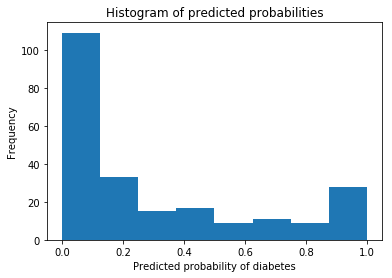

In [32]:
plt.hist(yprob, bins=8)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

### print the first 10 predicted probabilities

In [46]:
from sklearn.preprocessing import binarize
ypred1 = binarize(nb_model.predict_proba(xtest), 0.3)[:,1]

In [48]:
yprob[0:10]

array([0.99659359, 0.05976088, 0.03441036, 0.73182206, 0.04160295,
       0.01358036, 0.90016766, 0.9765691 , 0.85424699, 0.44527059])

### create new confusion matrix 

In [49]:
confusion_matrix(ytest, ypred1)

array([[120,  37],
       [ 28,  46]], dtype=int64)

### 2.14 Receiver Operating Characteristic (ROC) Curves

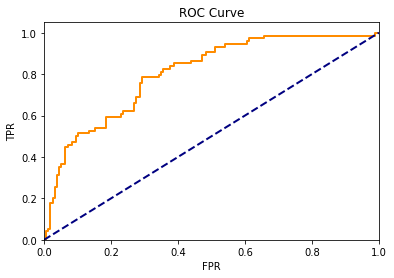

In [53]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(ytest,yprob)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#### define a function that accepts a threshold and prints sensitivity and specificity

In [55]:
def evaluate_threshold(thresh):
    print('Sensitivity:', tpr[thresholds > thresh][-1])
    print('Specificity:', 1 - fpr[thresholds > thresh][-1])
    
evaluate_threshold(0.5)

Sensitivity: 0.5135135135135135
Specificity: 0.8980891719745223


In [56]:
evaluate_threshold(0.3)

Sensitivity: 0.6216216216216216
Specificity: 0.7643312101910829


# 3. What is advantages Confusion matrix and ROC/AUC?

Advantages of Confusion Matrix:
- it helps calculate various measures of accuracy
- useful for multi-class classification as well

Advantages of ROC/AUC:
- does not require to set a classification threshold
- useful even when there is a high class imbalance